  if event.key is 'enter':



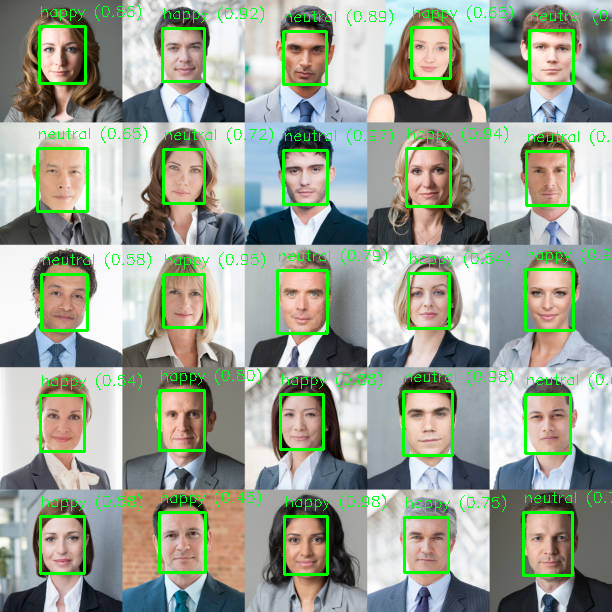

Number of engaged individuals: 25 (100.00%)
Number of disengaged individuals: 0 (0.00%)
Overall Audience Engagement Status: Highly Engaged


In [2]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow

# Initialize the emotion detector
emotion_detector = FER(mtcnn=True)

def detect_emotions(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Check if the image is loaded correctly
    if img is None:
        print("Error: Could not read the image. Please check the file path.")
        return

    # Detect emotions in the image
    emotions = emotion_detector.detect_emotions(img)

    # Initialize emotion counters
    positive_count = 0
    negative_count = 0

    # Define engaged and disengaged emotions
    engaged_emotions = {"happy", "neutral", "surprise"}
    disengaged_emotions = {"sad", "angry", "fear", "disgust"}

    # Loop through each face detected
    for face in emotions:
        bounding_box = face["box"]
        emotions_dict = face["emotions"]

        x, y, w, h = bounding_box
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle around face

        # Get the dominant emotion
        dominant_emotion = max(emotions_dict, key=emotions_dict.get)
        emotion_text = f"{dominant_emotion} ({emotions_dict[dominant_emotion]:.2f})"

        # Count the engaged and disengaged emotions
        if dominant_emotion in engaged_emotions:
            positive_count += 1
        elif dominant_emotion in disengaged_emotions:
            negative_count += 1

        # Display emotion text on the image with smaller text size
        cv2.putText(img, emotion_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (36, 255, 12), 1)  # Decreased scale to 0.5 and thickness to 1

    # Show the image with bounding boxes and emotion text
    cv2_imshow(img)
    cv2.destroyAllWindows()

    # Calculate the percentages
    total_faces = len(emotions)
    engaged_percentage = (positive_count / total_faces * 100) if total_faces > 0 else 0
    disengaged_percentage = (negative_count / total_faces * 100) if total_faces > 0 else 0

    # Print the results
    print(f"Number of engaged individuals: {positive_count} ({engaged_percentage:.2f}%)")
    print(f"Number of disengaged individuals: {negative_count} ({disengaged_percentage:.2f}%)")

    # Determine overall engagement status
    if engaged_percentage >= 70:
        engagement_status = "Highly Engaged"
    elif engaged_percentage >= 40:
        engagement_status = "Moderately Engaged"
    else:
        engagement_status = "Disengaged"

    print(f"Overall Audience Engagement Status: {engagement_status}")

# Image path (replace with your actual image path)
image_path = '/content/Test Image 3.jpg'
detect_emotions(image_path)

In [1]:
!pip install fer